In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marvel-wikia-data.csv')

In [3]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [5]:
df.drop(df[df['APPEARANCES'].isnull()].index, inplace=True)

In [6]:
df.drop(df[df['SEX'].isnull()].index, inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
scaler = MinMaxScaler()
appear_data = scaler.fit_transform(pd.DataFrame(df['APPEARANCES']))
df_appear = pd.DataFrame(appear_data)

In [9]:
df_appear.describe()

,0
count,14542.000000
mean,0.004125
std,0.024421
min,0.000000
25%,0.000000
50%,0.000495
75%,0.001732
max,1.000000


In [10]:
df['SEX'].value_counts()

Male Characters           10899
Female Characters          3599
Agender Characters           42
Genderfluid Characters        2
Name: SEX, dtype: int64

In [11]:
labelencoder = LabelEncoder()
sex_arr = labelencoder.fit_transform(df['SEX'])
sex_df = pd.DataFrame(sex_arr)

In [12]:
sex_df.value_counts().sort_values(ascending=False)

3    10899
1     3599
0       42
2        2
dtype: int64

In [13]:
onehotencoder = OneHotEncoder()
sex_arr = onehotencoder.fit_transform(pd.DataFrame(df['SEX'])).toarray()
sex_df = pd.DataFrame(sex_arr)
sex_df.columns = ['female', 'genderless', 'male', 'trans']

In [14]:
sex_df.describe()

,female,genderless,male,trans
count,14542.000000,14542.000000,14542.000000,14542.000000
mean,0.002888,0.247490,0.000138,0.749484
std,0.053666,0.431569,0.011727,0.433325
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [17]:
import seaborn as sns

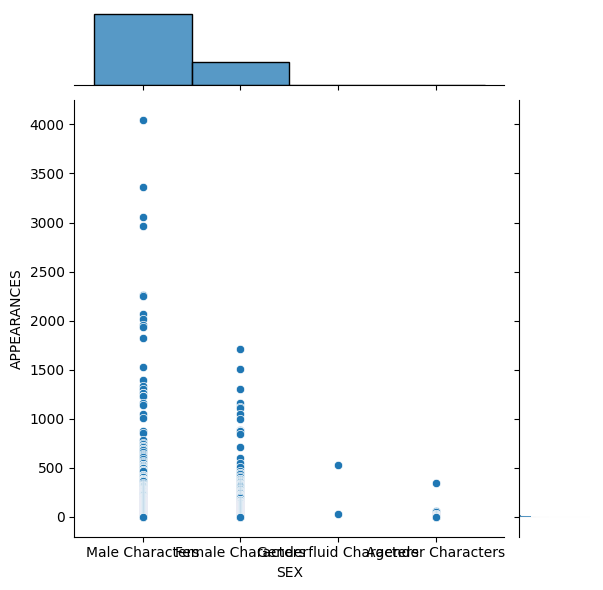

In [19]:
sns.jointplot(y='APPEARANCES', x='SEX', data=df)
plt.show()